In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz

In [12]:
X = []
Y = []
with open("votedata.txt") as data1:
    for line in data1.readlines():
        X.append([int(i) for i in line.replace("democrat","0").replace("republican","1").replace("?","2").replace("n","0").replace("y","1").split(",")[1:]])
        Y.append(0 if line.split(",")[0] == "democrat" else 1 )

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=37)

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

score = accuracy_score(Y_test,Y_pred)
print("Accuracy: {:.2f}%".format(score * 100))

Accuracy: 95.40%


In [14]:
class_names = ["democrat","republican"]
feature_names = ["handicapped-infants",
"water-project-cost-sharing",
"adoption-of-the-budget-resolution",
"physician-fee-freeze",
"el-salvador-aid",
"religious-groups-in-schools",
"anti-satellite-test-ban",
"aid-to-nicaraguan-contras",
"mx-missile",
"immigration",
"synfuels-corporation-cutback",
"education-spending",
"superfund-right-to-sue",
"crime",
"duty-free-exports",
"export-administration-act-south-africa",]

dot_data = tree.export_graphviz(clf, out_file=None, feature_names = feature_names, class_names = class_names) 
graph = graphviz.Source(dot_data)
graph.render("vote")

'vote.pdf'

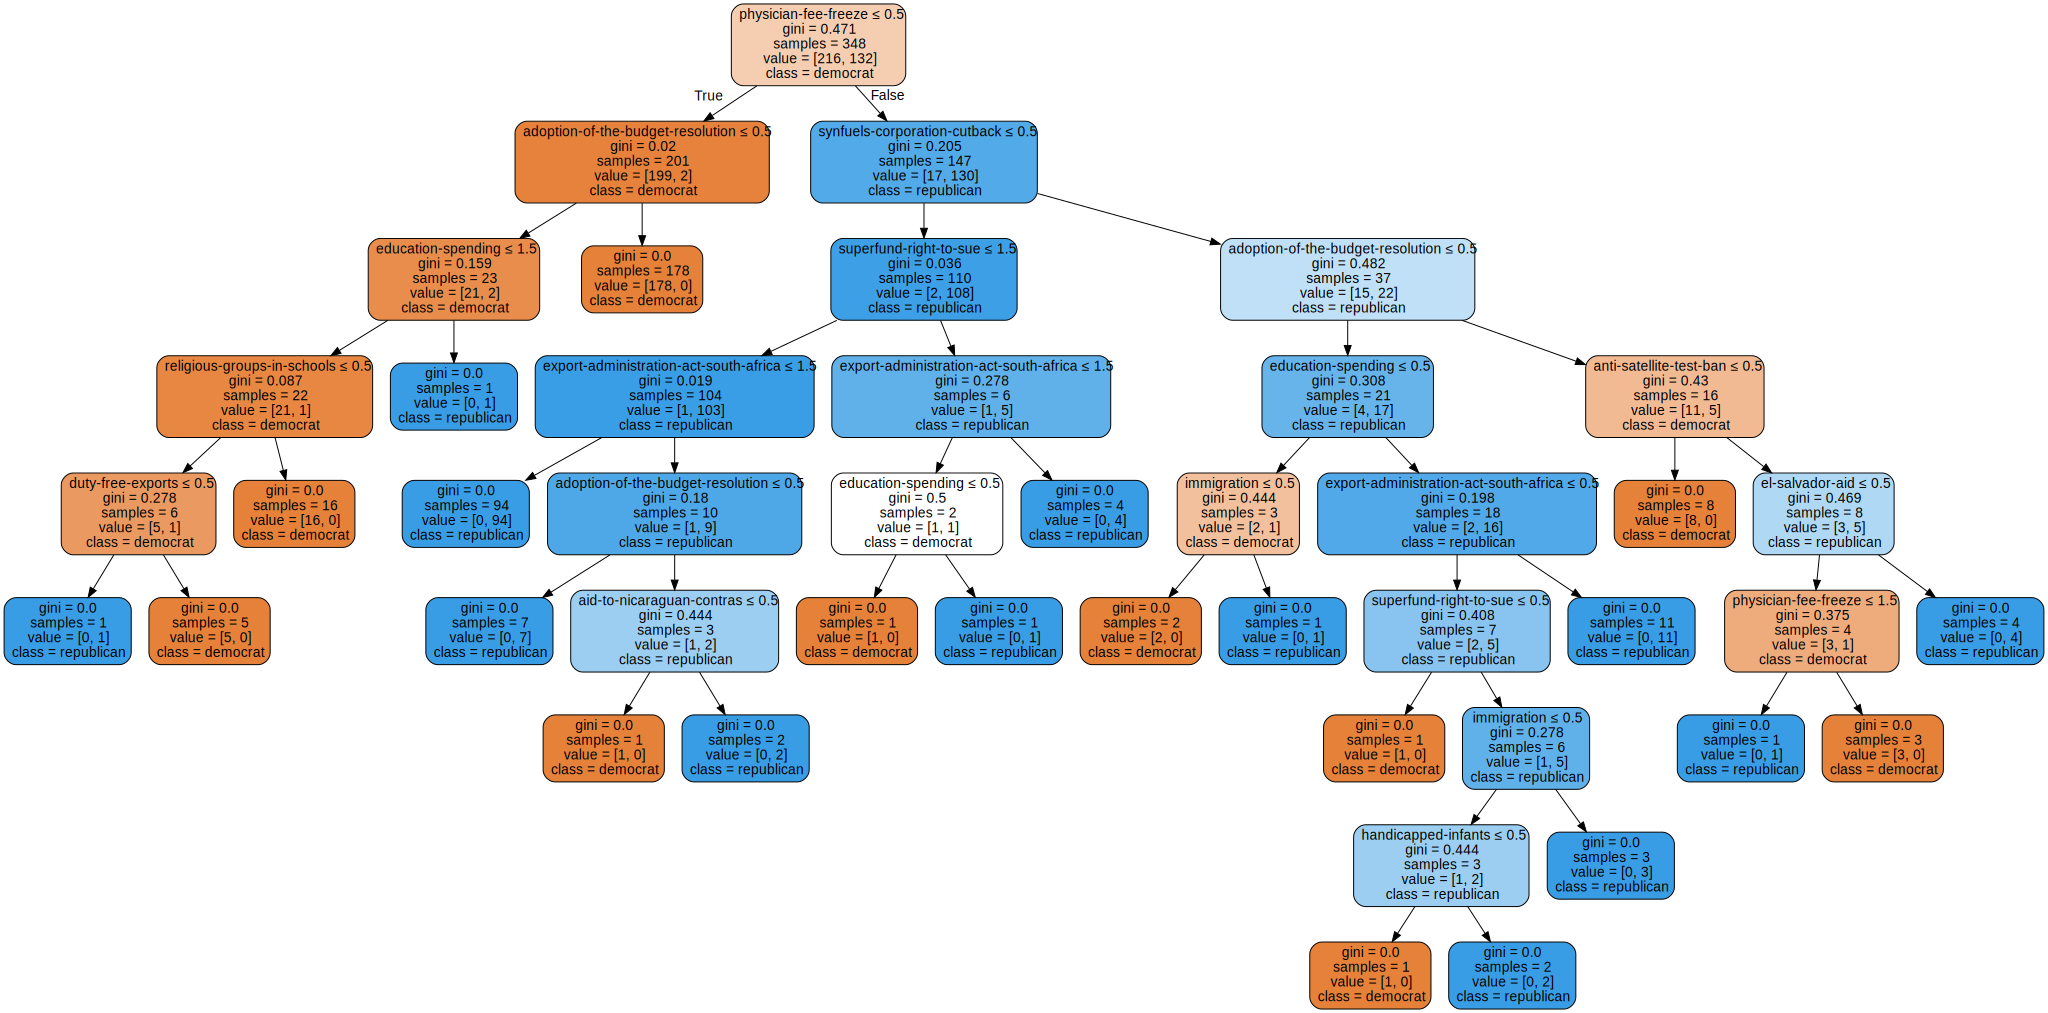

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph